In [235]:
import pandas as pd
import json
import os


In [236]:
def read_setting_data():
           

           
            base_path="model_settings\model_config.json"
            # Open the JSON file and load its contents
            with open(base_path, 'r') as file:
                data = json.load(file)
                clusters=int(data["number_clusers"])
                return clusters

In [237]:

model="model_"+str(read_setting_data())
data_path=model+"/output/index_with_topics.csv"
data=pd.read_csv(data_path)
base_path="analytics/"+model
if not os.path.exists(base_path):
    os.mkdir(base_path)

    paths_top_topics="analytics/"+model+"/top_topics"
    paths_top_words="analytics/"+model+"/top_wotds"
    os.mkdir(paths_top_topics)
    os.mkdir(paths_top_words)

text=data["parsed_text"]
clusters=data["topics"]
path=data["path"]

In [238]:
text

0       notazione asintotica copyright algoritmi strut...
1       notazione asintotico copyright noto copyright ...
2       notazione asintotico Copyright notazione grand...
3       notazione asintotico Copyright notazione grand...
4       notazione asintotico copyright osservazione de...
                              ...                        
6342    analisi sorgere dato finanziario dato giuridic...
6343    struttura schemo mediare schema mediare vision...
6344                  arlecchare system arlecchare system
6345    tecnologia arlecchare system schema matching P...
6346    architettura arlecchare system schema matching...
Name: parsed_text, Length: 6347, dtype: object

In [239]:
topic_to_count=dict()
topic_to_path=dict()
topic_to_top_words=dict()
for i in range(0,len(data)):
    
    if clusters[i] not in topic_to_count:
        topic_to_count[clusters[i]]=0
        topic_to_path[clusters[i]]=[]
    topic_to_count[clusters[i]]+=1
    topic_to_path[clusters[i]].append(path[i])

topic_to_count = dict(sorted(topic_to_count.items(), key=lambda x: x[1], reverse=True))

topic_to_count


{'[]': 1953,
 '[23]': 593,
 '[13]': 410,
 '[12]': 270,
 '[10]': 236,
 '[29]': 220,
 '[9]': 211,
 '[4]': 194,
 '[16]': 187,
 '[6]': 176,
 '[5]': 172,
 '[26]': 162,
 '[18]': 147,
 '[20]': 121,
 '[25]': 117,
 '[28]': 101,
 '[24]': 85,
 '[17]': 83,
 '[11]': 74,
 '[2]': 73,
 '[7]': 60,
 '[1]': 55,
 '[19]': 49,
 '[0]': 48,
 '[15]': 34,
 '[14]': 31,
 '[3]': 27,
 '[8]': 26,
 '[27]': 19,
 '[21]': 19,
 '[22]': 18,
 '[23, 25]': 12,
 '[5, 29]': 11,
 '[7, 23]': 10,
 '[11, 18]': 9,
 '[13, 29]': 9,
 '[6, 29]': 9,
 '[13, 23]': 8,
 '[1, 24]': 8,
 '[13, 25]': 8,
 '[11, 23]': 7,
 '[2, 12]': 7,
 '[9, 13]': 7,
 '[2, 23]': 6,
 '[12, 23]': 6,
 '[7, 19]': 6,
 '[4, 10]': 6,
 '[5, 20]': 6,
 '[23, 29]': 6,
 '[5, 13]': 6,
 '[20, 29]': 6,
 '[13, 16]': 6,
 '[13, 18]': 5,
 '[9, 23]': 5,
 '[5, 26]': 5,
 '[10, 28]': 5,
 '[19, 29]': 4,
 '[1, 4]': 4,
 '[10, 13]': 4,
 '[7, 29]': 4,
 '[9, 16]': 4,
 '[12, 29]': 4,
 '[24, 28]': 4,
 '[6, 23]': 4,
 '[23, 24]': 3,
 '[0, 23]': 3,
 '[4, 13]': 3,
 '[4, 24]': 3,
 '[16, 27]': 3,
 '

In [240]:
import json

path=paths_top_topics+"/topic_to_doc.json"


# Open a file in write mode
with open(path ,'w') as file:
    # Write the dictionary to the file in formatted JSON
    json.dump(topic_to_count, file, indent=4)

In [241]:
print(len(text))
print(len(clusters))

6347
6347


# ANalisi occorrenza delle parole per topic

In [242]:
import ast
import numpy as np
topic_to_words=dict()
i=0
vuoti=0
lista_topics_vuoti=[]
for i in range(0,len(text)-1):
    
    
    topic=clusters[i]
    
    try:
        
        words=text[i].split(" ")
    
        if topic not in topic_to_words:
            topic_to_words[topic]=[]
        for w in words:
            topic_to_words[topic].append(w)
    except AttributeError:
            
            vuoti+=1
            lista_topics_vuoti.append(topic)
    
import json

path=paths_top_topics+"/topic_words.json"


# Open a file in write mode
with open(path ,'w') as file:
    # Write the dictionary to the file in formatted JSON
    json.dump(topic_to_words, file, indent=4)
    

In [243]:
bar_plot_view=dict()
for k in topic_to_words.keys():
    bar_plot_view[k]=len(topic_to_words[k])

bar_plot_view_sort = dict(sorted(bar_plot_view.items(), key=lambda item: item[1],reverse=True))

print(bar_plot_view_sort)


{'[]': 81254, '[13]': 26638, '[23]': 21868, '[29]': 10090, '[10]': 8938, '[16]': 8106, '[26]': 6973, '[12]': 6767, '[5]': 5892, '[9]': 5420, '[25]': 4550, '[20]': 3807, '[18]': 3579, '[28]': 3122, '[4]': 3079, '[24]': 3045, '[6]': 2931, '[11]': 2205, '[2]': 1898, '[0]': 1713, '[7]': 1676, '[17]': 1501, '[19]': 1416, '[1]': 1266, '[10, 28]': 1232, '[13, 25]': 1087, '[14]': 959, '[15]': 825, '[13, 16]': 668, '[23, 25]': 603, '[21]': 596, '[8]': 527, '[3]': 526, '[13, 29]': 406, '[10, 13]': 400, '[27]': 394, '[5, 29]': 383, '[23, 29]': 366, '[22]': 355, '[7, 23]': 348, '[13, 18]': 325, '[5, 13]': 284, '[5, 26]': 280, '[13, 23]': 276, '[5, 20]': 262, '[11, 18]': 257, '[7, 19]': 247, '[20, 29]': 242, '[11, 23]': 233, '[2, 12]': 225, '[9, 13]': 201, '[19, 29]': 166, '[12, 23]': 156, '[9, 23]': 145, '[4, 6]': 144, '[1, 4]': 143, '[2, 23]': 142, '[5, 9]': 140, '[24, 28]': 136, '[6, 23]': 135, '[4, 10]': 126, '[4, 24]': 126, '[25, 26]': 125, '[18, 23]': 114, '[5, 25]': 94, '[19, 26]': 87, '[9, 

In [244]:
import json

path=paths_top_words+"/topic_to_word_len.json"


# Open a file in write mode
with open(path ,'w') as file:
    # Write the dictionary to the file in formatted JSON
    json.dump(bar_plot_view_sort, file, indent=4)

In [245]:
import json

# Open the JSON file in read mode
with open(path, 'r') as file:
    # Load the JSON data into a dictionary
    my_dict = json.load(file)

# Access and use the dictionary as needed


In [246]:
#topic to word_occurrency
topic_to_word_occ=dict()
for k in topic_to_words.keys():
    word2count = {}
    for word in topic_to_words[k]:
        if word in word2count:
            word2count[word] += 1
        else:
            word2count[word] = 1
    word2count_order = dict(sorted(word2count.items(), key=lambda item: item[1],reverse=True))
    topic_to_word_occ[k]=word2count_order

In [247]:
import json

path=paths_top_words+"/topic_to_word_occ.json"


# Open a file in write mode
with open(path ,'w') as file:
    # Write the dictionary to the file in formatted JSON
    json.dump(topic_to_word_occ, file, indent=4)

# Analytics


In [248]:
import matplotlib.pyplot as plt

In [249]:
def create_bar_plot(data,path_to_save):
    data_to_view= list(data.items())[:200]
    x_axis=[]
    y_axis=[]
    for i in data_to_view:
        x_axis.append(i[0])
        y_axis.append(i[1])
    plt.figure(figsize=(60, 10))  # Set the figure size (width, height)
    plt.bar(x_axis, y_axis)

    # Customize the plot
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis', fontsize=1)
    plt.yscale('log')
    plt.title('Topic to count')
    plt.xticks(rotation=90)  # Adjust the rotation angle as needed
    plt.savefig(path_to_save, format='jpeg')
   

## Topic to document occurceny

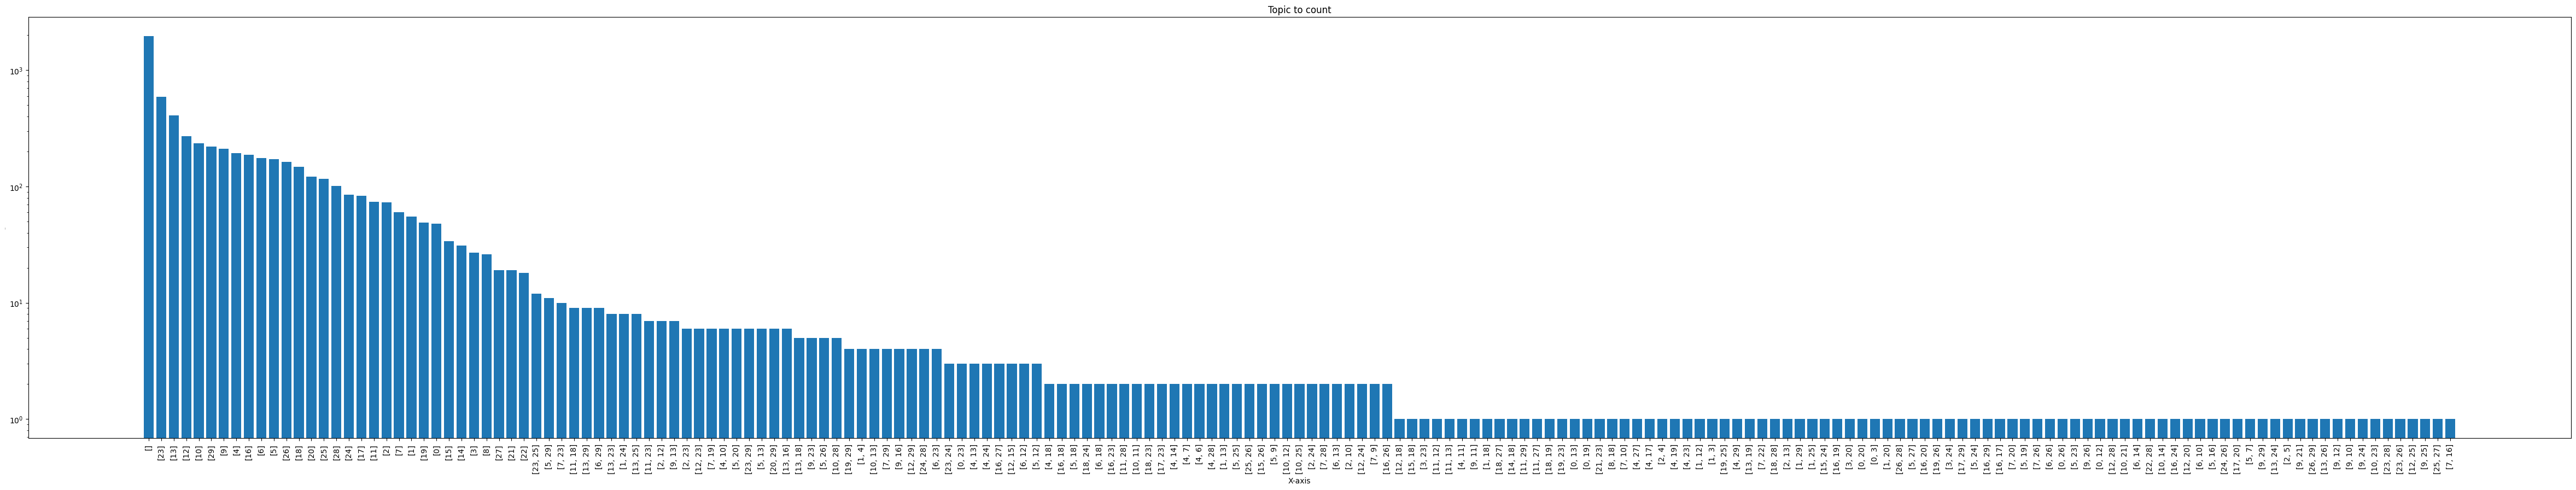

In [250]:
create_bar_plot(topic_to_count,paths_top_words+"/topic_to_doc.jpg")

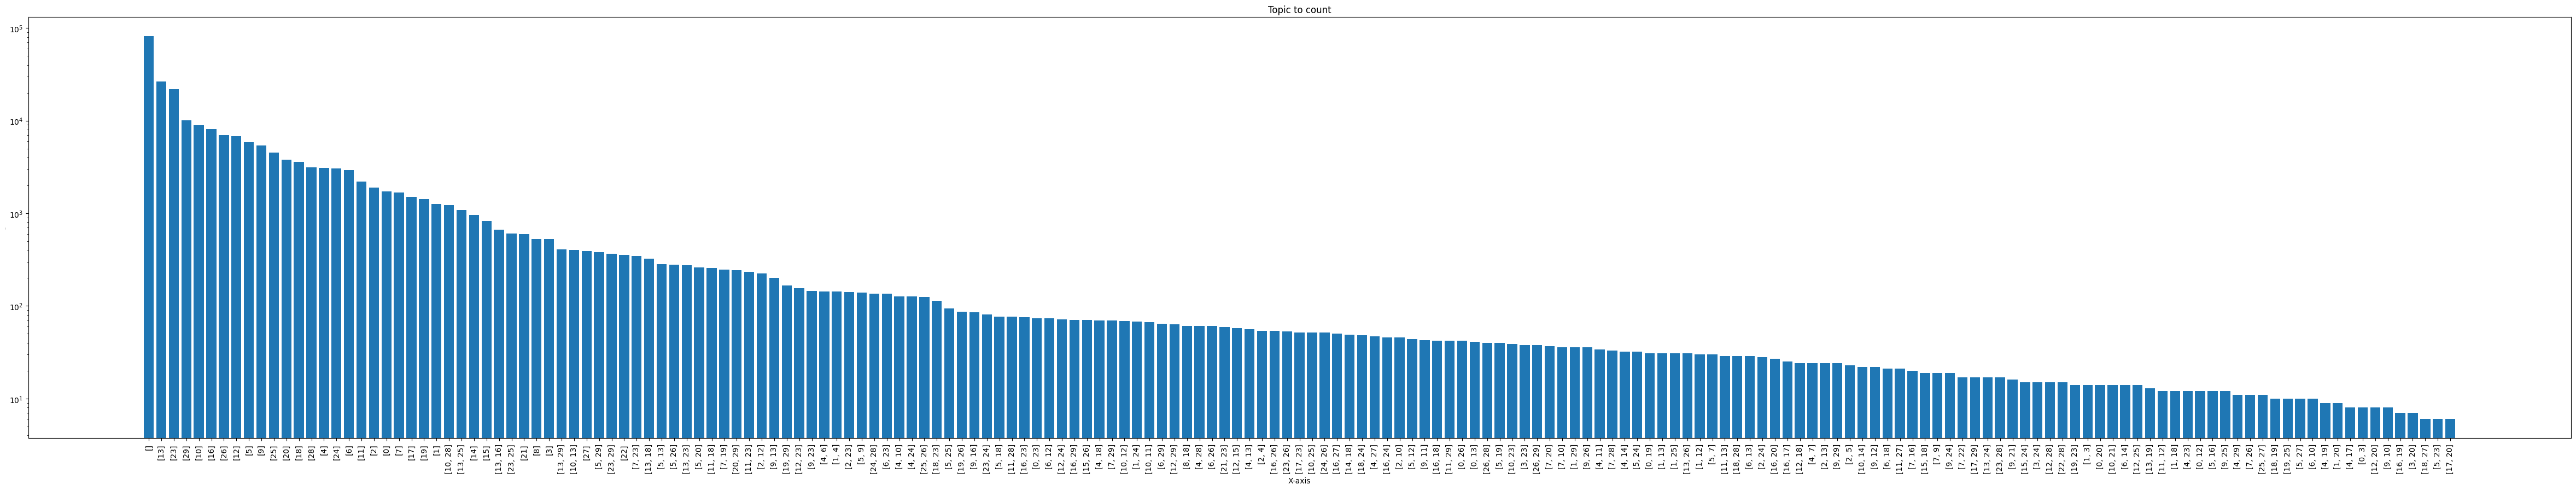

In [251]:
create_bar_plot(bar_plot_view_sort,paths_top_words+"/topic_to_words_number.jpg")

In [252]:
top_10_most_pop_topics=list(topic_to_count.items())[:20]

top_10_most_pop_topic_to_top_ten_words=dict()
for i in top_10_most_pop_topics:
    i=i[0]
    top_10_most_pop_topic_to_top_ten_words[i]=list(topic_to_word_occ[i].items())[:10]

top_10_most_pop_topic_to_top_ten_words

{'[]': [('essere', 465),
  ('base', 392),
  ('classe', 386),
  ('il', 359),
  ('valore', 348),
  ('due', 322),
  ('potere', 297),
  ('campo', 280),
  ('oggetto', 279),
  ('sistema', 276)],
 '[23]': [('oggetto', 820),
  ('programmazione', 446),
  ('orientare', 437),
  ('classe', 425),
  ('tipo', 373),
  ('metodo', 371),
  ('elemento', 268),
  ('il', 232),
  ('public', 229),
  ('int', 210)],
 '[13]': [('essere', 305),
  ('potere', 174),
  ('venire', 141),
  ('funzione', 128),
  ('dovere', 126),
  ('glucosio', 125),
  ('pu', 124),
  ('acido', 106),
  ('fondamente', 105),
  ('sicuro', 103)],
 '[12]': [('vettore', 325),
  ('matrice', 260),
  ('combinatorio', 113),
  ('base', 107),
  ('esercizio', 80),
  ('geometrio', 76),
  ('due', 69),
  ('geometria', 69),
  ('seguente', 60),
  ('allora', 57)],
 '[10]': [('forza', 234),
  ('punto', 120),
  ('sistema', 109),
  ('numero', 85),
  ('due', 84),
  ('velocit', 79),
  ('flusso', 77),
  ('fisico', 67),
  ('campo', 62),
  ('superficie', 59)],
 '[29]

In [253]:
import json

path=paths_top_words+"/topic_top_10_words.json"


# Open a file in write mode
with open(path ,'w') as file:
    # Write the dictionary to the file in formatted JSON
    json.dump(top_10_most_pop_topic_to_top_ten_words, file, indent=4)

In [254]:
import pandas as pd
df=pd.DataFrame(top_10_most_pop_topic_to_top_ten_words)
df.to_csv(paths_top_words+"/top_words_for_topic.csv",index=False)
